In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

#import tensorflow as tf
import sys
sys.executable

'/home/psavine/anaconda3/envs/unet/bin/python'

In [2]:
from tf_unet import image_gen
from tf_unet import image_util
from tf_unet import unet
from tf_unet import util

In [4]:
nx = 572
ny = 572
pth = '/home/psavine/data/test/unet_test/*'

In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

Number of files used: 53


shape (572, 572), counts False:262898-True:64286, type bool, max True, min False
shape (572, 572), counts 0.0:64286-1.0:262898, type float32, max 1.0, min 0.0
shape (572, 572), counts 0.0:262898-1.0:64286, type float32, max 1.0, min 0.0
(array([ 0.,  1.]), array([327184, 327184]))


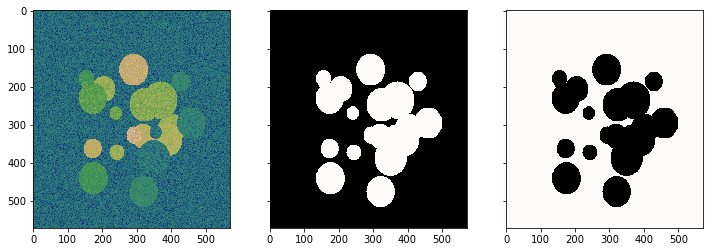

In [6]:
x_test, y_test = generator(1)
y_test.dtype

fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
ax[2].imshow(y_test[0,...,0], aspect="auto")
print(np.unique(y_test, return_counts=True))

In [ ]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,4))
n =2
ax[0].imshow(x_test[n,...,0], aspect="auto")
ax[1].imshow(y_test[n,...,1], aspect="auto")
ax[2].imshow(y_test[n,...,0], aspect="auto")
print(np.unique(y_test, return_counts=True))

In [5]:
generator2 = image_util.SplitImageDataProvider(pth, chan=2)

Number of files used: 53


shape (256, 256), counts False:61523-True:4013, type bool, max True, min False
shape (256, 256), counts 0.0:4013-1.0:61523, type float32, max 1.0, min 0.0
shape (256, 256), counts 0.0:61523-1.0:4013, type float32, max 1.0, min 0.0
shape (256, 256), counts False:63626-True:1910, type bool, max True, min False
shape (256, 256), counts 0.0:1910-1.0:63626, type float32, max 1.0, min 0.0
shape (256, 256), counts 0.0:63626-1.0:1910, type float32, max 1.0, min 0.0
shape (256, 256), counts False:62594-True:2942, type bool, max True, min False
shape (256, 256), counts 0.0:2942-1.0:62594, type float32, max 1.0, min 0.0
shape (256, 256), counts 0.0:62594-1.0:2942, type float32, max 1.0, min 0.0
shape (256, 256), counts False:56227-True:9309, type bool, max True, min False
shape (256, 256), counts 0.0:9309-1.0:56227, type float32, max 1.0, min 0.0
shape (256, 256), counts 0.0:56227-1.0:9309, type float32, max 1.0, min 0.0
shape (256, 256), counts False:59073-True:6463, type bool, max True, min Fal

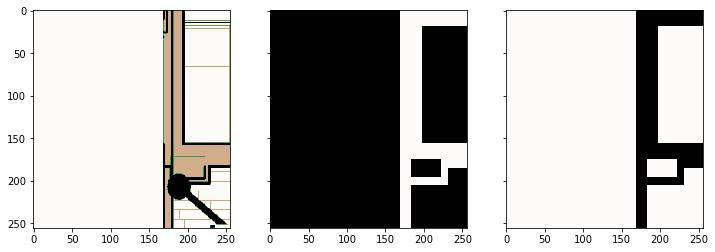

In [6]:

x_test, y_test = generator2(5)
y_test.dtype
figs = 5
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,4))
n =3
ax[0].imshow(x_test[n,...,0], aspect="auto")
ax[1].imshow(y_test[n,...,1], aspect="auto")
ax[2].imshow(y_test[n,...,0], aspect="auto")


In [9]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2017-08-25 22:30:09,224 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [10]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [11]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)

2017-08-25 22:30:28,867 Removing '/home/psavine/source/tf_unet/demo/prediction'
2017-08-25 22:30:28,868 Removing '/home/psavine/source/tf_unet/demo/unet_trained'
2017-08-25 22:30:28,868 Allocating '/home/psavine/source/tf_unet/demo/prediction'
2017-08-25 22:30:28,869 Allocating '/home/psavine/source/tf_unet/demo/unet_trained'
2017-08-25 22:30:36,034 Verification error= 79.2%, loss= 0.6988
2017-08-25 22:30:37,095 Start optimization
2017-08-25 22:30:42,300 Iter 0, Minibatch Loss= 0.6189, Training Accuracy= 0.8473, Minibatch error= 15.3%
2017-08-25 22:30:50,589 Iter 2, Minibatch Loss= 0.5135, Training Accuracy= 0.8852, Minibatch error= 11.5%
2017-08-25 22:30:58,337 Iter 4, Minibatch Loss= 0.4566, Training Accuracy= 0.8641, Minibatch error= 13.6%
2017-08-25 22:31:06,446 Iter 6, Minibatch Loss= 0.4219, Training Accuracy= 0.8621, Minibatch error= 13.8%
2017-08-25 22:31:14,465 Iter 8, Minibatch Loss= 0.4756, Training Accuracy= 0.8178, Minibatch error= 18.2%
2017-08-25 22:31:22,627 Iter 10, Mi

In [13]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-08-25 22:54:32,024 Restoring parameters from ./unet_trained/model.cpkt
2017-08-25 22:54:32,241 Model restored from file: ./unet_trained/model.cpkt


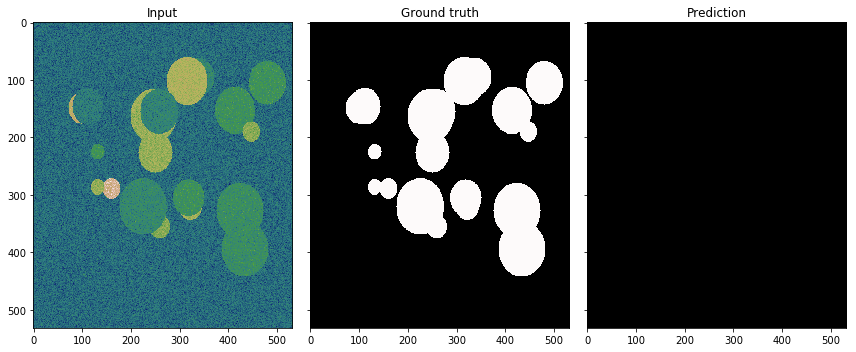

In [16]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")

In [35]:
from PIL import Image
from scipy.misc

In [47]:
pth = '/home/psavine/data/test/unet_test2/*'


In [41]:
box = (0, 0, 255, 255)
a = im.crop(box)
a.size
#im[:,:im.shape[1]//2,:]

(255, 255)

In [42]:
im.show(a)

In [57]:
idp = image_util.ImageDataProvider(pth, a_min=256, a_max=256)

Number of files used: 1


/home/psavine/source/tf_unet/tf_unet/image_util.py:75: RuntimeWarning: invalid value encountered in true_divide
  


/home/psavine/anaconda3/envs/unet/lib/python3.5/site-packages/matplotlib/colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/psavine/anaconda3/envs/unet/lib/python3.5/site-packages/numpy/ma/core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


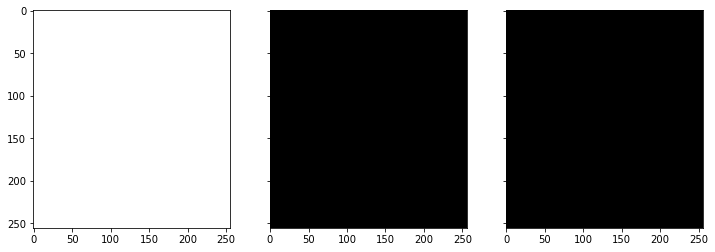

In [58]:
x_test, y_test = idp(1)


fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
ax[2].imshow(y_test[0,...,0], aspect="auto")